Найти параметры распределения(параметры центров скоплений числа звезд) не 
забыть минус в функции минимизации?

from scipy.optimize import minimize, least_squares, curve_fit
import lmfit

In [5]:
from scipy.optimize import minimize
def f1(theta):
    x, y = theta
    return (x - 0.5) **2 + (y + 1.5) **2 + 3.0
result = minimize(f1, [0.0,0.0])
print(result)
help(minimize)

      fun: 3.0000000000000036
 hess_inv: array([[0.94999999, 0.15000001],
       [0.15000001, 0.55000002]])
      jac: array([-8.94069672e-08, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 0.49999995, -1.50000003])
Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where '

In [3]:
import numpy as np
from scipy.optimize import minimize
def f(theta):
    x, y = theta
    return (x - 0.5) **2 + (y + 1.5) **2 + 3.0 + np.random.rand()
result = minimize(f, [0.0,0.0])
print(result)
help(minimize)

      fun: 5.727065228037446
 hess_inv: array([[ 1.52356336e-11, -8.87307000e-12],
       [-8.87304477e-12,  5.16757832e-12]])
      jac: array([-2826686.09231836, -9245177.27593607])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 129
      nit: 2
     njev: 30
   status: 2
  success: False
        x: array([ 2.64911914e-04, -8.56011678e-06])
Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial g

In [7]:
def jac(theta):
    x, y = theta
    return np.array([
        2 * (x - 0.5),
        2 * (y + 1.5),
    ])
result = minimize(f, [0.0, 0.0], jac = jac)
print(result)

      fun: 3.7441761536750895
 hess_inv: array([[0.95, 0.15],
       [0.15, 0.55]])
      jac: array([-1.11022302e-16,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 0.5, -1.5])


EM method

In [40]:
import matplotlib.pyplot as plt
a = 0
b = 1
def gen_x(tau, mu, sigma2, n=100_000):
    n_n = int(n * tau)
    n_u = n - n_n
    
    x_n = np.random.normal(mu, np.sqrt(sigma2), n_n)
    x_u = np.random.uniform(a,b,n_u)
    x = np.concatenate((x_n, x_u))
    return x

def t(x, tau, mu, sigma2):
    #"T_ij = p_j(x_i, z=j) = tau_j * p_j(x_i) / sum(tau_j * p_j(x_i))"
    p_tau_n = (tau/np.sqrt(2*np.pi*sigma2)*np.exp(-0.5 * (x-mu)**2 / sigma2)) #p_n*tau_n
    p_tau_u = np.zeros_like(x)
    idx = (x>a) & (x<b)
    p_tau_u[idx] = (1-tau) / (b-a)#Nakladyvaet masky(udalaet te, kotorye False)
    t_n = p_tau_n / (p_tau_n + p_tau_u)
    t_u = p_tau_u / (p_tau_n + p_tau_u)
    return t_n, t_u

def theta(x, old):
    #old=theta^(t) is konspekta = (tau, mu, sigma2)
    t_n, t_u = t(x,*old)#tau eto dolya predstaviteley normalnogo raspr
    tau = np.sum(t_n) / (np.sum(t_n) + np.sum(t_u))
    mu = np.sum(x * t_n) / np.sum(t_n)#average in nolmal raspredelenie
    sigma2 = np.sum ((x - mu)**2*t_n)/np.sum(t_n)
    return tau, mu, sigma2
    
def main():
    tau0 = 0.3
    mu0 = 0.7
    sigma20 = 0.1 ** 2
    th0 = (tau0, mu0, sigma20)
    x = gen_x(*th0)
    plt.hist(x, 100)
    #Parametry kotorye ma zagadali
    
    tau = 0.5
    mu = 0.5
    sigma2 = 0.5**2
    #Nachalnoe priblizhenie
    
    th = (tau, mu, sigma2)
    for _ in range(10):
        th = theta(x, th)
        print(th[0], th[1], np.sqrt(th[2]))

0.40869094292469604 0.5610532711559135 0.2536834235086825
0.3992767290005599 0.5919843371438812 0.21499718999640693
0.39456181827591535 0.6160503414715974 0.19269370262781496
0.3906192109976036 0.6351684275782279 0.1754591554604226
0.3863452880444688 0.6504119499405017 0.16116813686142314
0.38128819022533395 0.6624463198896565 0.1493523336757608
0.3753534346962323 0.6717794162180476 0.13979064028869898
0.36871118137879966 0.6788869632087872 0.13219556675093816
0.36169058690700373 0.6842253385717367 0.12621846967769074
0.35465573363460595 0.6882033574642819 0.12151644143041049


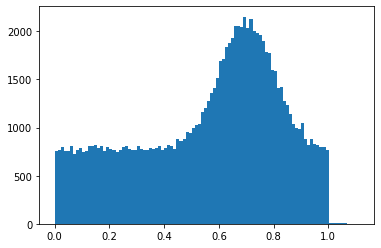

In [41]:
if __name__ == '__main__':
    main()